In [ ]:
install.packages("maps")
library(maps)

Warning message:
"package 'maps' is in use and will not be installed"


In [ ]:

# remove.packages("ggmap") # get rid of the default version
install.packages("devtools")
devtools::install_github("stadiamaps/ggmap") # get a more recent trusted version

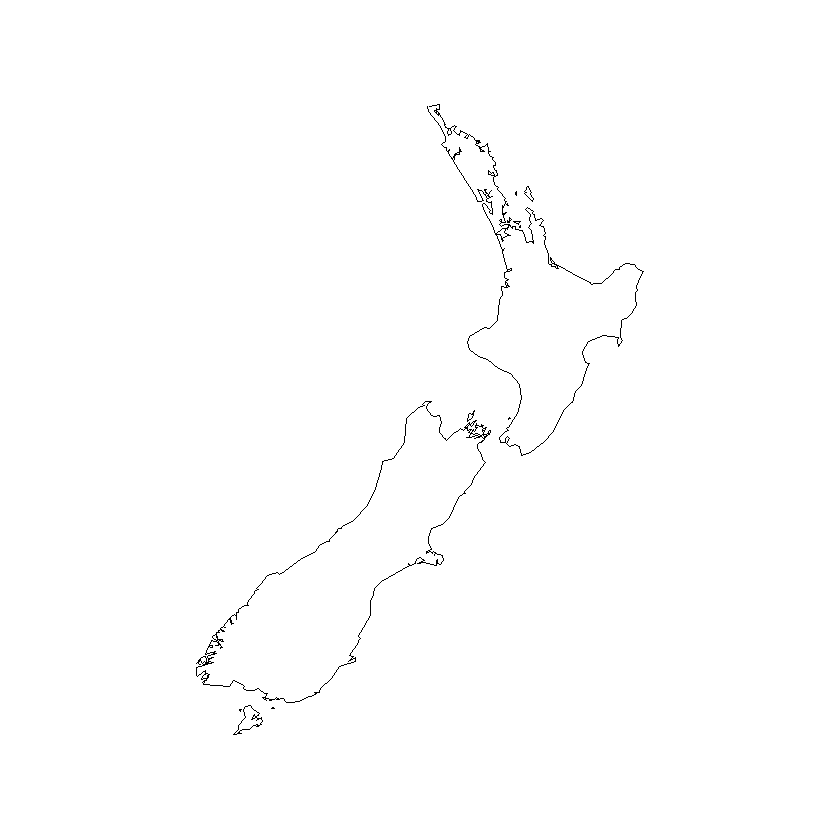

In [24]:
# Init ----
library(maps)
map("nz")

library(ggmap) # load ggmap


In [ ]:

# Define location 3 ways
# 1. location/address
myLocation1 <- "Melbourne"
myLocation1

# 2. lat/long
myLocation2 <- c(lon = -95.3632715, lat = 29.7632836) # not "Melbourne"
myLocation2

# 3. an area or bounding box (using 4 points),
#   lower left lon,
#   lower left lat,
#   upper right lon,
#   upper right lat
# (this can be a little glitchy for Google maps)
myLocation3 <- c(-130, 30, -105, 50)
myLocation3

library(tmaptools) # Convert location/address to its lat/long coordinates:
myLocation4 <- geocode_OSM("Melbourne")
myLocation4$coords
# Yes, Melbourne is where it's supposed to be in, in Australia
# longitude 144.96316
# latitude -37.81422


In [ ]:

# Stadiamap ----
?get_stadiamap

remove.packages("ggmap") # get rid of the default version
install.packages("devtools")
devtools::install_github("stadiamaps/ggmap") # get a more recent trusted version


ℹ Creating file C:\Users\adria\OneDrive\Documents/.Renviron

ℹ Adding key to C:\Users\adria\OneDrive\Documents/.Renviron

ℹ © Stadia Maps © OpenMapTiles © OpenStreetMap contributors.



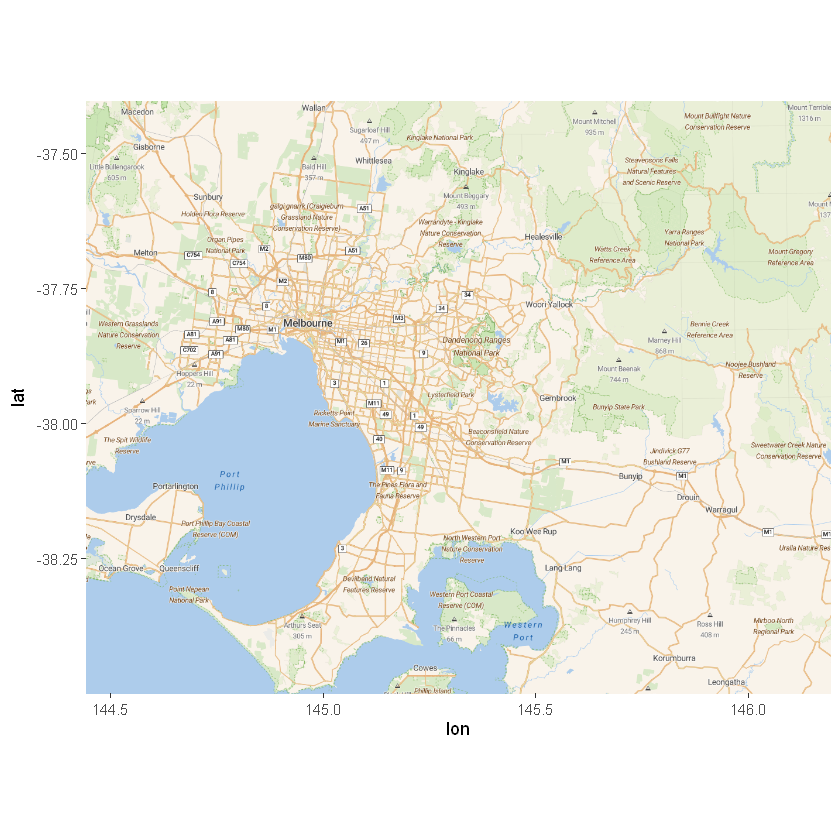

In [25]:

ggmap::register_stadiamaps("2424a0a5-d7b6-4e26-b357-4a857fb16bce",write=TRUE)
#myLocation4 <- geocode_OSM("Melbourne") # previously done
bboxVector <- as.vector(myLocation4$bbox) 
bbox1 <- c( left = bboxVector[1], 
            bottom = bboxVector[2], 
            right = bboxVector[3], 
            top = bboxVector[4] ) 
myMap <- get_stadiamap( bbox = bbox1, 
                        maptype = "outdoors", 
                        zoom = 10 ) 
ggmap(myMap)

In [ ]:
# Rstudio package fix
update.packages(ask = FALSE, checkBuilt = TRUE)

# After that, you need to install 2 packages:

install.packages(c("curl", "yaml"))

# At last, you can solve this issue by installing the trusted github versions of the packages by:

install.packages("devtools") 
devtools::install_github("hadley/ggplot2@v2.2.0") # ggplot2 is now actually v3.4.4 (Feb 2024)
devtools::install_github("dkahle/ggmap")

# Restart Rstudio after this

In [27]:
install.packages('mapproj')

Installing package into 'C:/Users/adria/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'mapproj' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\adria\AppData\Local\Temp\Rtmpeu3wOt\downloaded_packages


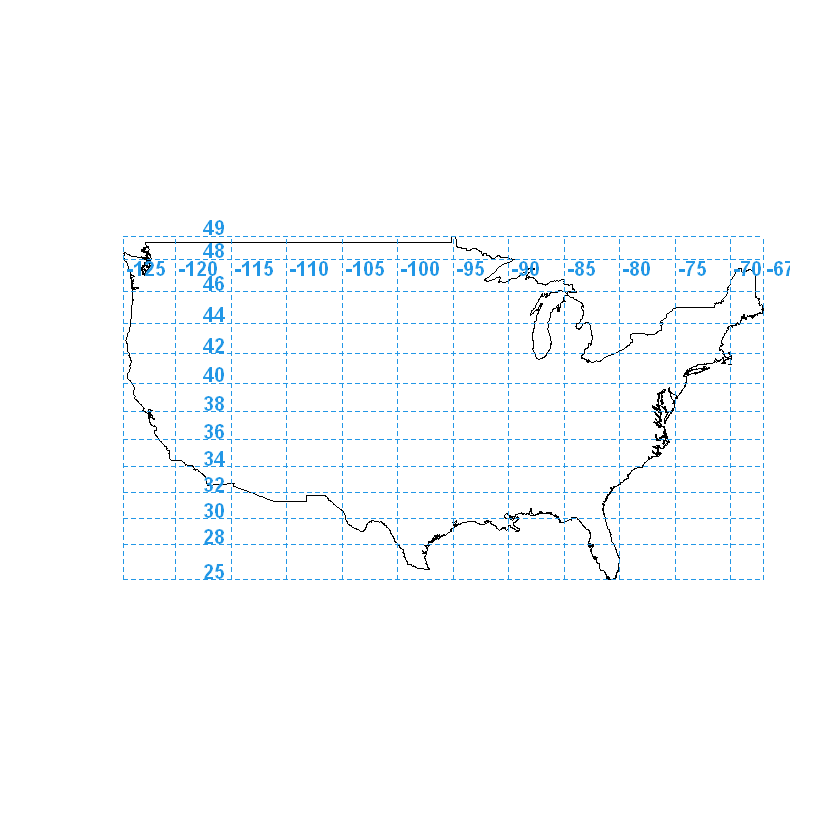

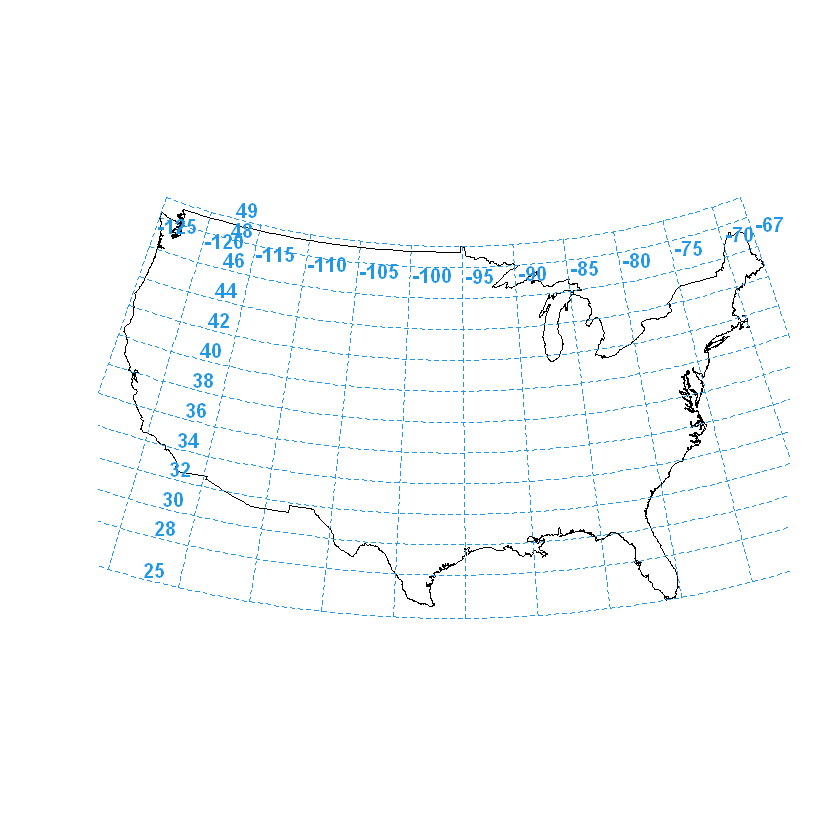

In [32]:
require(mapproj) 
# get map data (lat & lon for boundaries in this case) 
m <- map("usa", plot = FALSE) 

# try mercator first 
map(m, project = "mercator") 
map.grid(m) # draw graticules 

# change the projection to albers 
map(m, project = "albers", par=c(39,45)) 
map.grid(m) # draw graticules to compare more easily

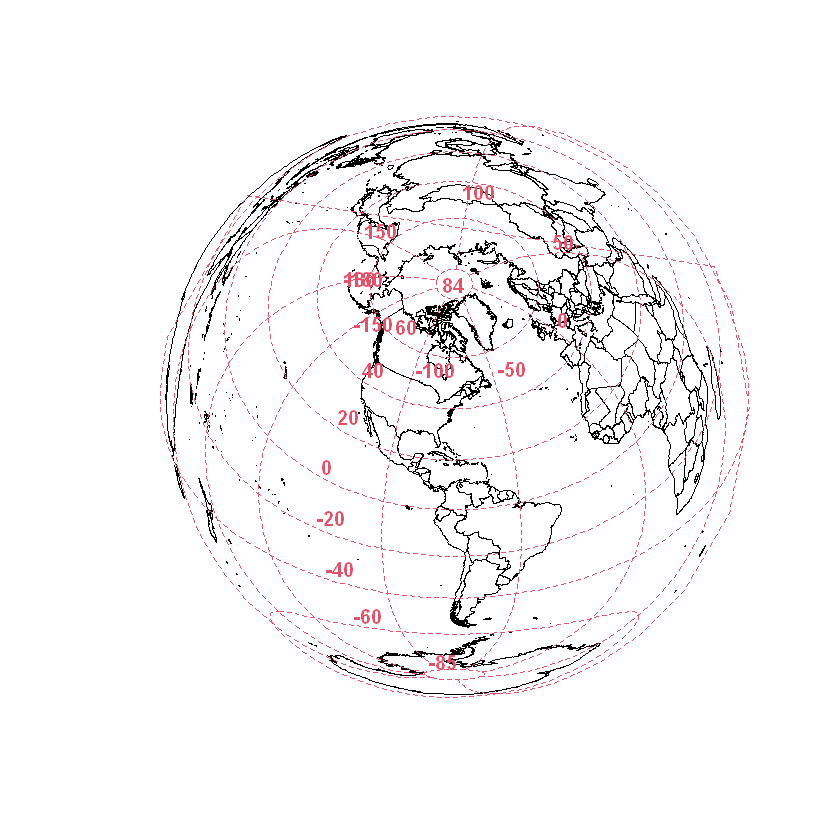

In [50]:
# get unprojected world limits 
m <- map('world', plot = FALSE) 
# center on New York 
map(m, 
    proj = 'azequalarea', 
    orient = c(41,-74,0)) 
    # orient = myLocation4)
map.grid(m, col = 2) # draw graticules

x         y 
144.96317 -37.81425

Warning message in map(m, proj = "orth", orient = c(41, -74, 0)):
"projection failed for some data"


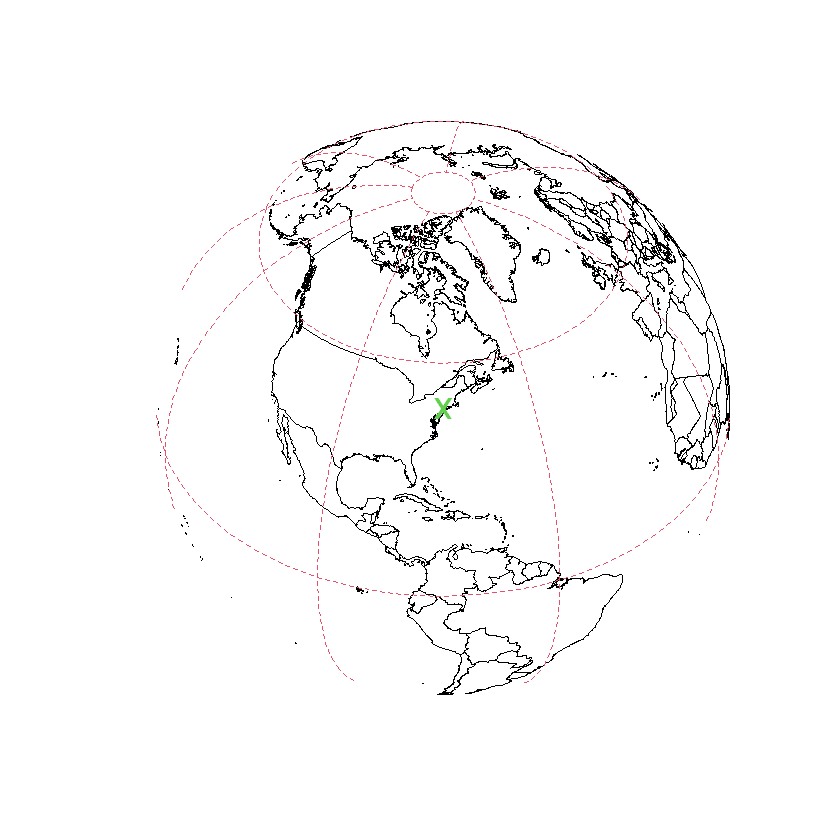

In [47]:
# map(m, 
#     proj = 'orth', 
#     orient = c(41,-74,0)) 
# map.grid(m, col = 2, nx = 6, ny = 5, label = FALSE, lty = 2) 
# points( mapproject( list(y = 41, x = -74) ), 
#         col = 3,
#         pch = "x", 
#         cex = 2 )
#         # centre on NY
myLocation4$coords
map(m, 
    proj = 'orth', 
    orient = c(41,-74,0)) 
map.grid(m, col = 2, nx = 6, ny = 5, label = FALSE, lty = 2) 
points( mapproject( list(y = 41, x = -74) ), 
        col = 3,
        pch = "x", 
        cex = 2 )
        # centre on NY

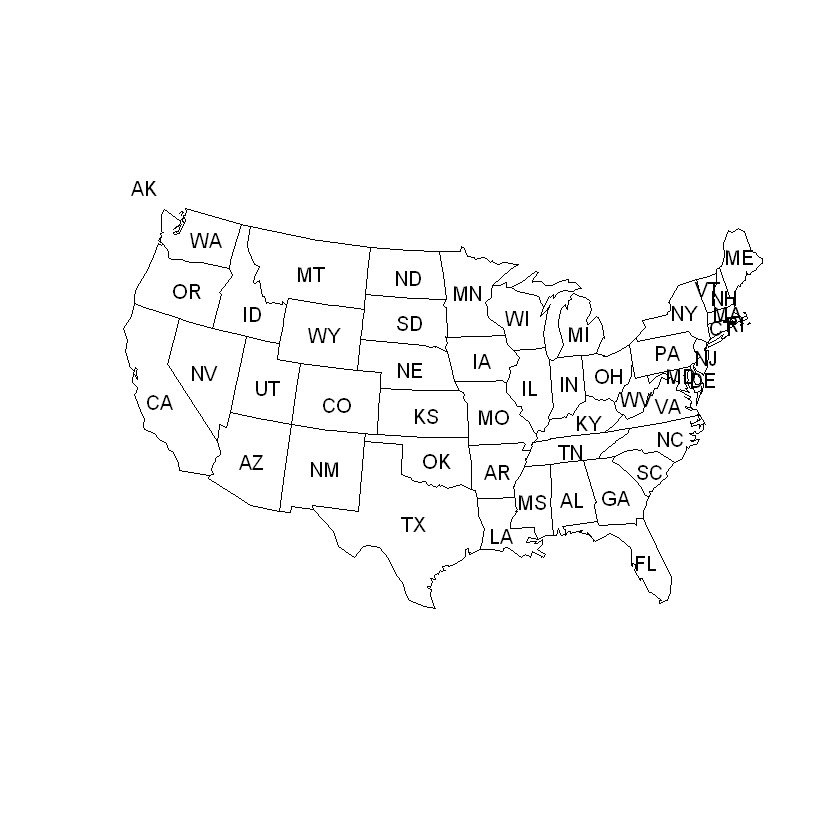

In [35]:
map("state", 
    proj='bonne', 
    param=45) 
data(state) 
text( mapproject( state.center ), 
      state.abb )